# Dataproject



### Import nessasary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
import yfinance as yf

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
%matplotlib inline


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataprojectv as dp


pd.set_option('display.max_rows', 20)

### Clean Data 

**METHOD**
Fetch Data from Yahoo Finance API & Senate/House Watcher API

Examples are provided below: 

In [ ]:
house_raw = dp.fetch_data(print_df = True)
reps = house_raw["representative"].unique().tolist()
df_reps = pd.DataFrame(reps, columns=["Representatives"])




### Create Dynamic Portfolio displaying the portfolio returns for the given Senator / House Representative if they chose only to hold their stocks

**METHOD**

This is done by doing "x" and provinding "y" as an input.

In [ ]:
# a. create a list of senators
senators = senate_raw["representative"].unique().tolist()
df_senators = pd.DataFrame(senators, columns=["senators"])

# Display the list of all senators
display(df_senators)

# b. create a list of tickers

tickers = senate_raw["ticker"].unique().tolist()
df_tickers = pd.DataFrame(tickers, columns=["tickers"])

# Display the list of all tickers
display(df_tickers)



### Enumerate for tickes and assign them to a Senator / House Representative if they have a stock in that company

**METHOD**
- Enumerate for tickes and assign them to a Senator / House Representative if they have a stock in that company
     - Create a dictionary with the tickers as keys and the Senator / House Representative as values
- Create a dynamic portfolio for each Senator / House Representative
- Create a dynamic portfolio for each Senator / House Representative if they only held their stocks
- Plot the portfolio returns for each Senator / House Representative
- Compare the portfolio returns for each Senator / House Representative with the S&P 500

Dropdown(description='Senator:', options=('Thomas R. Carper', 'Mitch Mcconnell', 'Rick Scott', 'Richard Blumen…

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- N/A: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

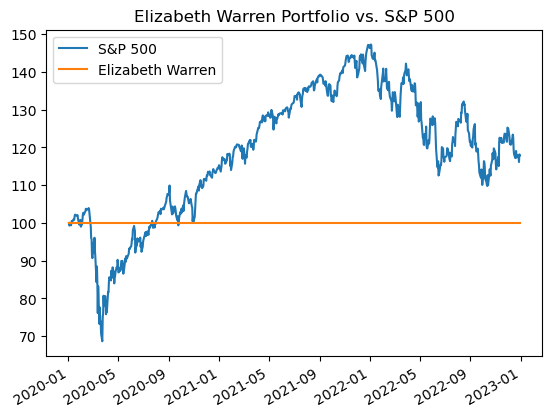

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- N/A: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

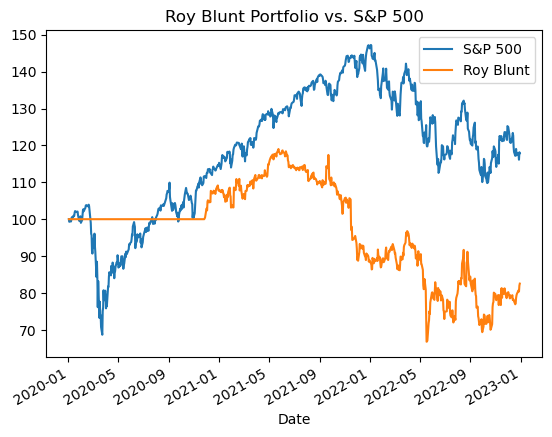

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- N/A: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

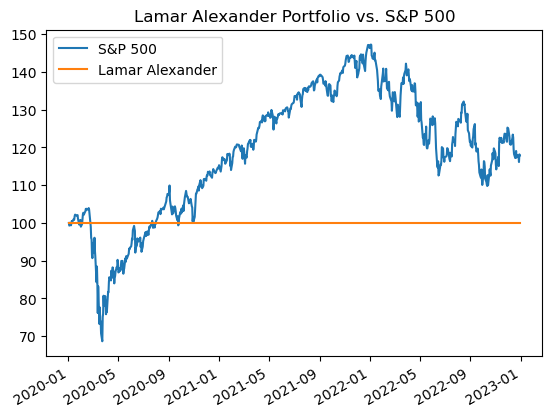

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- N/A: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

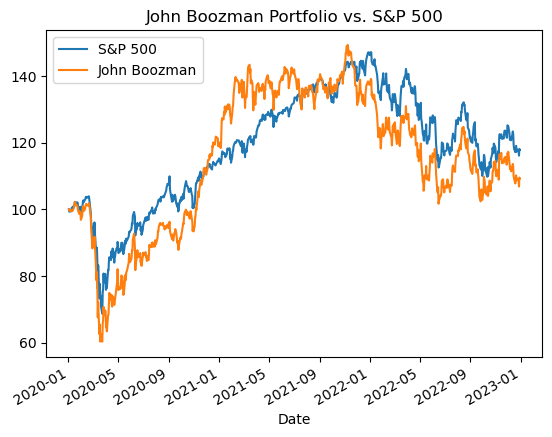

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- N/A: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

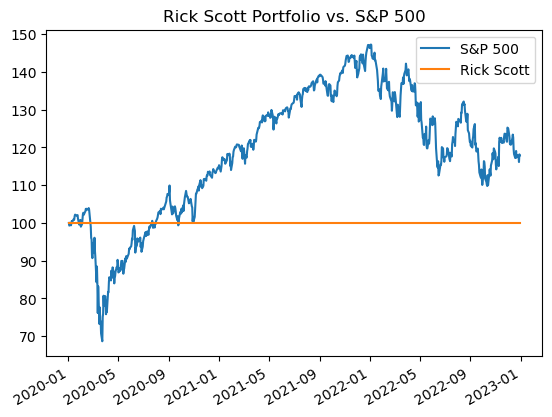

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<Figure size 1200x800 with 0 Axes>

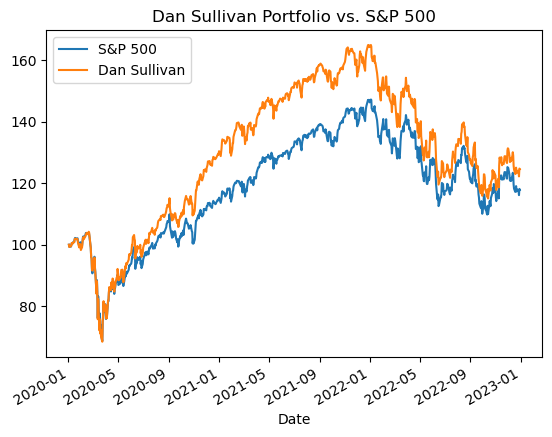

In [ ]:
ticker_senator_dict = {}
for ticker in tickers:
    reps = senate_raw[senate_raw['ticker'] == ticker]['representative'].unique().tolist()
    ticker_senator_dict[ticker] = reps


# Function to get stock returns
def get_stock_returns(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['return'] = stock_data['Adj Close'].pct_change()
    return stock_data['return']

def get_rep_portfolio_returns(senator, start_date, end_date):
    rep_tickers = [ticker for ticker, reps in ticker_senator_dict.items() if senator in reps]
    rep_returns = pd.DataFrame()
    for ticker in rep_tickers:
        ticker_returns = get_stock_returns(ticker, start_date, end_date)
        rep_returns[ticker] = ticker_returns
    return rep_returns.mean(axis=1)

def plot_selected_senator_vs_sp500(senator):
    start_date = '2020-01-01'
    end_date = '2022-12-31'
    
    selected_senator_returns = get_rep_portfolio_returns(senator, start_date, end_date)
    sp500_returns = get_stock_returns('^GSPC', start_date, end_date)

    combined_returns = pd.DataFrame({'S&P 500': sp500_returns, f'{senator}': selected_senator_returns})
    indexed_returns = combined_returns.add(1).cumprod().fillna(method='ffill').fillna(1) * 100

    plt.figure(figsize=(12, 8))
    indexed_returns.plot(title=f"{senator} Portfolio vs. S&P 500")
    plt.show()

# Create the dropdown widget
senator_selector = wg.Dropdown(options=senators, description='Senator:')
display(senator_selector)

# Observe the changes in the dropdown and update the plot accordingly
senator_selector.observe(lambda change: plot_selected_senator_vs_sp500(change.new) if change.name == 'value' else None)


